In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('titanic.csv')
df


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [77]:

type(df.count())


def group_df(num_of_group, df):
    '''
        Group the df by num_of_group
        return a dictionary which its keys are the range of the fares, the values are the accordinate survived rate
    '''
    sort_by_fare_df = df.sort_values('Fare')
    total = sort_by_fare_df['Fare'].count()
    
    count = 0
    survived = 0
    dead = 0
    low_fare = 0
    high_fare = 0
    group_to_survival_rate = {}
    
    for index, row in sort_by_fare_df.iterrows():
        if count >= total / num_of_group:
            # Form the group name, the key of the dic
            group_name = '{} - {}'.format(low_fare, high_fare)
            # Calculate the survival_rate
            survival_rate = survived / (survived + dead)
            group_to_survival_rate[group_name] = survival_rate
            
            # Update the variables
            count = 0
            survived = 0
            dead = 0 
            low_fare = row['Fare'] 

        if row['Survived'] == 0:
            dead += 1
        else:
            survived += 1
    
        high_fare = row['Fare']
        count += 1
    
    if count > 0: # If there are more group, add to the dic
        group_name = '{} - {}'.format(low_fare, high_fare)
        # Calculate the survival_rate
        survival_rate = survived / (survived + dead)
        group_to_survival_rate[group_name] = survival_rate
        
    return pd.DataFrame(list(group_to_survival_rate.items()), columns = ['Fare range', 'Survival rate'])

group_df = group_df(8, df)
group_df

,Fare range,Survival rate
0,0 - 7.75,0.162162
1,7.75 - 7.925,0.252252
2,7.925 - 9.8458,0.189189
3,10.1708 - 14.4542,0.405405
4,14.4583 - 25.4667,0.432432
5,25.4667 - 31.275,0.477477
6,31.275 - 69.55,0.477477
7,69.55 - 512.3292,0.690909


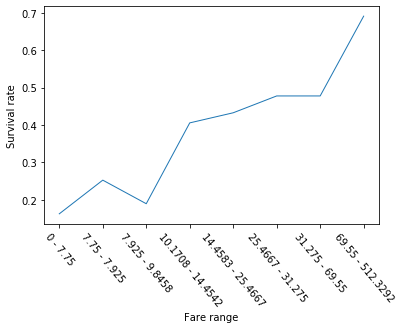

In [78]:
# sns.scatterplot(x = 'Fare', y = 'Survived', hue = 'Survived', data = df)

# Plot the line graph  
plot = sns.lineplot(x = 'Fare range', y = 'Survival rate', sort = False, data = group_df, linewidth = 1)
type(plot)
for tick in plot.get_xticklabels():
    tick.set_rotation(-50)

# The plot shows that the higher the fare range is, the higher the survival rate is